In [15]:
# Import required libraries
import os
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path
from phone_diagnostics_analysis import (
    PhoneDiagnosticParser, 
    analyze_battery_health, 
    create_visualizations, 
    export_data, 
    run_complete_analysis
)
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")


Libraries imported successfully!


In [16]:
# Load the diagnostic parser from the Python file
print("Diagnostic parser loaded successfully!")

Diagnostic parser loaded successfully!


In [17]:
# Initialize the parser and discover sessions
parser = PhoneDiagnosticParser()
sessions = parser.discover_sessions()

# Display discovered sessions
print("Discovered diagnostic sessions:")
for session_name, session_info in sessions.items():
    timestamp_str = session_info['timestamp'].strftime('%Y-%m-%d %H:%M:%S') if session_info['timestamp'] else 'Unknown'
    print(f"  {session_name}: {timestamp_str} ({len(session_info['files'])} files)")

Found 1 diagnostic sessions
Discovered diagnostic sessions:
  g-2522-A_162930: Unknown (11 files)


In [18]:
# Parse all sessions and create summary DataFrame
parsed_data = parser.parse_all_sessions()
summary_df = parser.get_summary_dataframe()

print("Summary of all diagnostic sessions:")
display(summary_df)

Parsing session: g-2522-A_162930
Parsed 1 sessions
Summary of all diagnostic sessions:


,session,timestamp,files_parsed,battery_level,battery_voltage,battery_temperature,charging_status,ac_powered,usb_powered,phone_temp,model,brand,android_version,cpu_temp,gpu_temp,battery_temp_thermal,skin_temp
0,g-2522-A_162930,None,5,81,4,327,2,False,True,340,IV2201,OnePlus,13,39.936,39.936,32.7,36.999


In [19]:
# Display detailed information for the most recent session
if parsed_data:
    latest_session = max(parsed_data.keys(), key=lambda x: parsed_data[x]['timestamp'] or datetime.min)
    latest_data = parsed_data[latest_session]
    
    print(f"\nDetailed information for latest session: {latest_session}")
    print(f"Timestamp: {latest_data['timestamp']}")
    print(f"Files parsed: {latest_data['files_parsed']}")
    
    if 'battery_basic' in latest_data:
        print("\nBattery Information:")
        for key, value in latest_data['battery_basic'].items():
            print(f"  {key}: {value}")
    
    if 'device_info' in latest_data:
        print("\nDevice Information:")
        for key, value in latest_data['device_info'].items():
            if not key.startswith('prop_'):  # Skip build properties for readability
                print(f"  {key}: {value}")
    
    if 'thermal' in latest_data:
        print("\nThermal Information:")
        if 'temperatures' in latest_data['thermal']:
            for name, temp_info in latest_data['thermal']['temperatures'].items():
                print(f"  {name}: {temp_info['value']}°C (Type: {temp_info['type']})")


Detailed information for latest session: g-2522-A_162930
Timestamp: None
Files parsed: ['battery_basic.txt', 'cpuinfo.txt', 'device_info.txt', 'power.txt', 'thermal.txt']

Battery Information:
  oplus_Charger voltage: 4875
  oplus_Battery current: -11
  oplus_ChargerTechnology: 0
  oplus_ChargeFastCharger: False
  oplus_PlugType: 2
  oplus_UpdatesStopped: False
  oplus_UsbHwStatus: 0
  oplus_BatteryHwStatus: 1
  oplus_HwStatusIsSet: 1
  oplus_BatteryIcStatus: 1
  oplus_IcStatusIsSet: 1
  oplus_mUsbStatus: 0
  oplus_PhoneTemp: 340
  oplus_ThermalFeatureOn: True
  std_AC powered: False
  std_USB powered: True
  std_Wireless powered: False
  std_Max charging current: 500000
  std_Max charging voltage: 5000000
  std_Charge counter: 3645000
  std_status: 2
  std_health: 2
  std_present: True
  std_level: 81
  std_scale: 100
  std_voltage: 4
  std_temperature: 327
  std_technology: Li-ion

Device Information:
  model: IV2201
  brand: OnePlus
  android_version: 13

Thermal Information:
  CPU

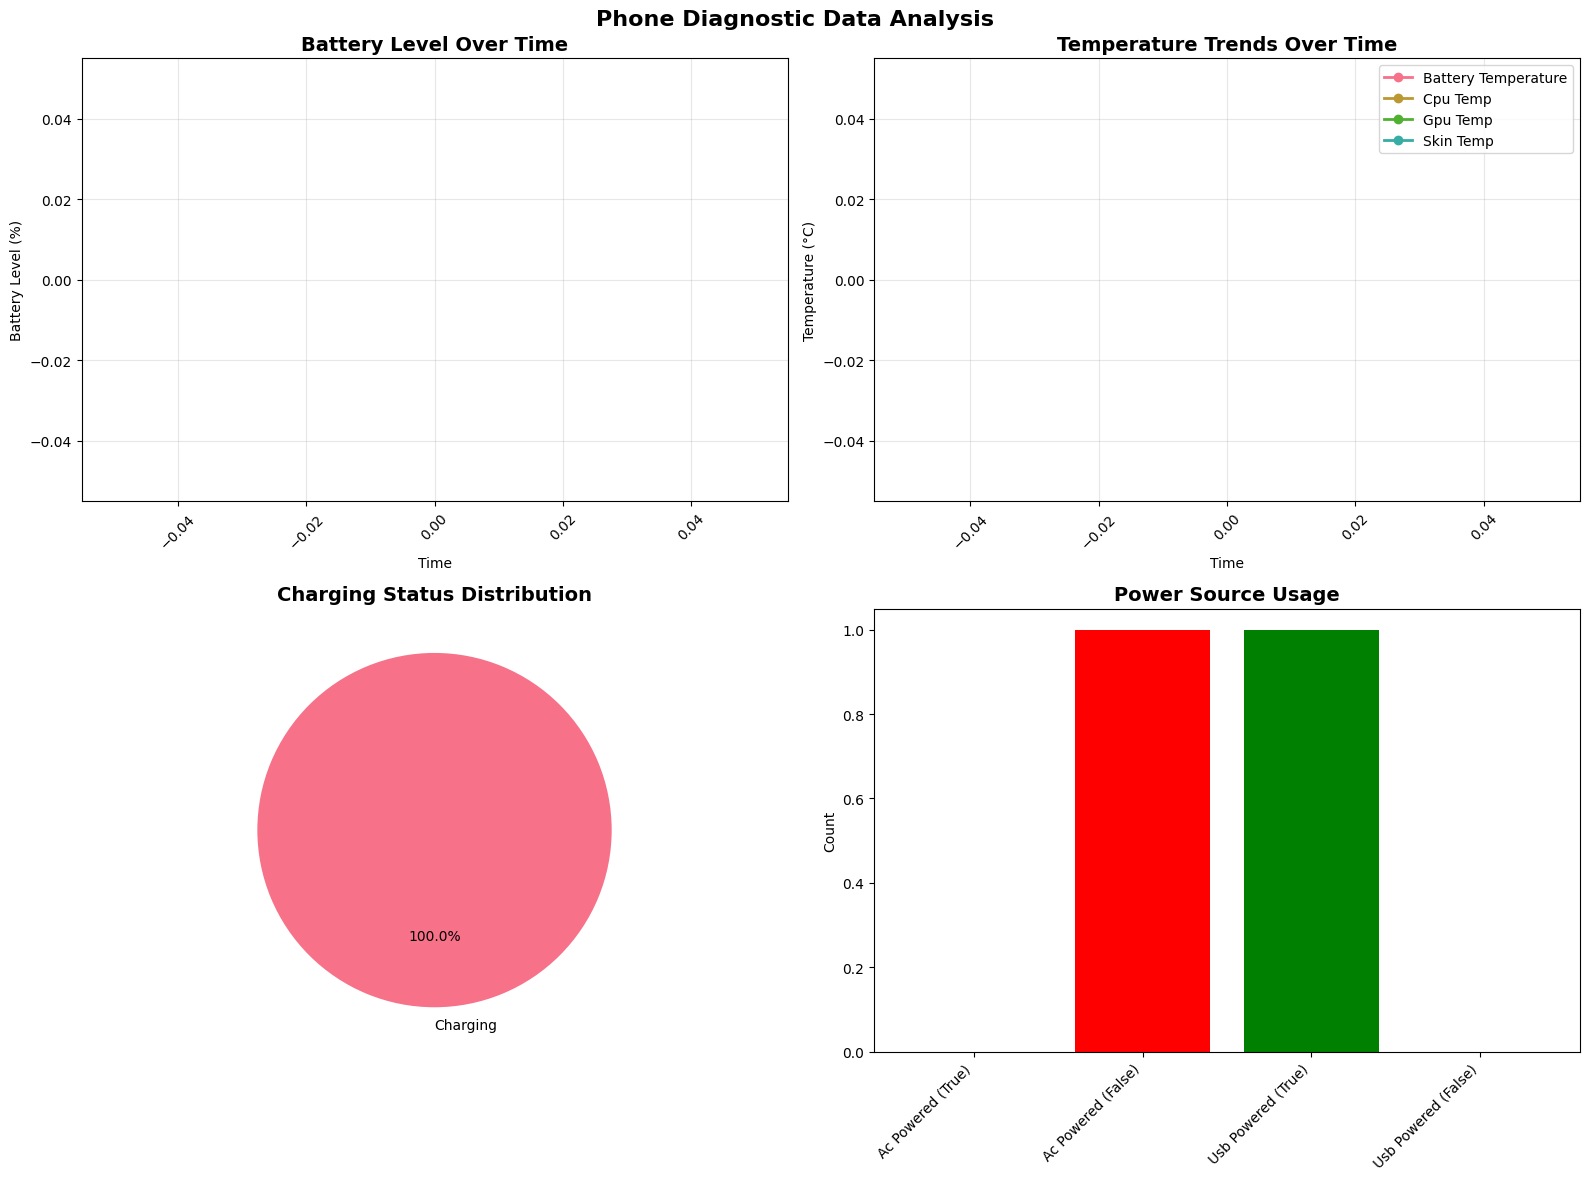

In [20]:
# Create visualizations
create_visualizations(summary_df)

In [21]:
# Analyze battery health
analyze_battery_health(summary_df)

=== BATTERY HEALTH ANALYSIS ===

Battery Level Statistics:
  Average: 81.0%
  Minimum: 81%
  Maximum: 81%
  Standard Deviation: nan%

=== TEMPERATURE ANALYSIS ===

Battery Temperature:
  Average: 327.0°C
  Minimum: 327.0°C
  Maximum: 327.0°C
  Standard Deviation: nan°C
  ⚠️  WARNING: Maximum temperature exceeds 45°C!
  ⚠️  WARNING: Average temperature is high!

Cpu Temp:
  Average: 39.9°C
  Minimum: 39.9°C
  Maximum: 39.9°C
  Standard Deviation: nan°C

Gpu Temp:
  Average: 39.9°C
  Minimum: 39.9°C
  Maximum: 39.9°C
  Standard Deviation: nan°C

Skin Temp:
  Average: 37.0°C
  Minimum: 37.0°C
  Maximum: 37.0°C
  Standard Deviation: nan°C


=== DEVICE INFORMATION ===

Device Model: IV2201
Brand: OnePlus
Android Version: 13
Total Diagnostic Sessions: 1
Data Collection Period: nan


In [22]:
# Export data for further analysis
export_data(summary_df, parsed_data)

Summary data exported to: phone_diagnostics_summary_20250822_162957.csv
Detailed data exported to: phone_diagnostics_detailed_20250822_162957.json

Data Export Summary:
  Total Sessions: 1
  Data Columns: 17
  Memory Usage: 0.5 KB


Running complete analysis pipeline...
=== PHONE DIAGNOSTIC DATA ANALYSIS ===

1. Discovering diagnostic sessions...
Found 1 diagnostic sessions

2. Parsing diagnostic data...
Parsing session: g-2522-A_162930
Parsed 1 sessions

3. Creating summary data...

4. Summary of all diagnostic sessions:
           session timestamp  files_parsed  battery_level  battery_voltage  \
0  g-2522-A_162930      None             5             81                4   

   battery_temperature  charging_status  ac_powered  usb_powered  phone_temp  \
0                  327                2       False         True         340   

    model    brand android_version  cpu_temp  gpu_temp  battery_temp_thermal  \
0  IV2201  OnePlus              13    39.936    39.936                  32.7   

   skin_temp  
0     36.999  

5. Battery health analysis:
=== BATTERY HEALTH ANALYSIS ===

Battery Level Statistics:
  Average: 81.0%
  Minimum: 81%
  Maximum: 81%
  Standard Deviation: nan%

=== TEMPERATURE ANALYSIS ===

Bat

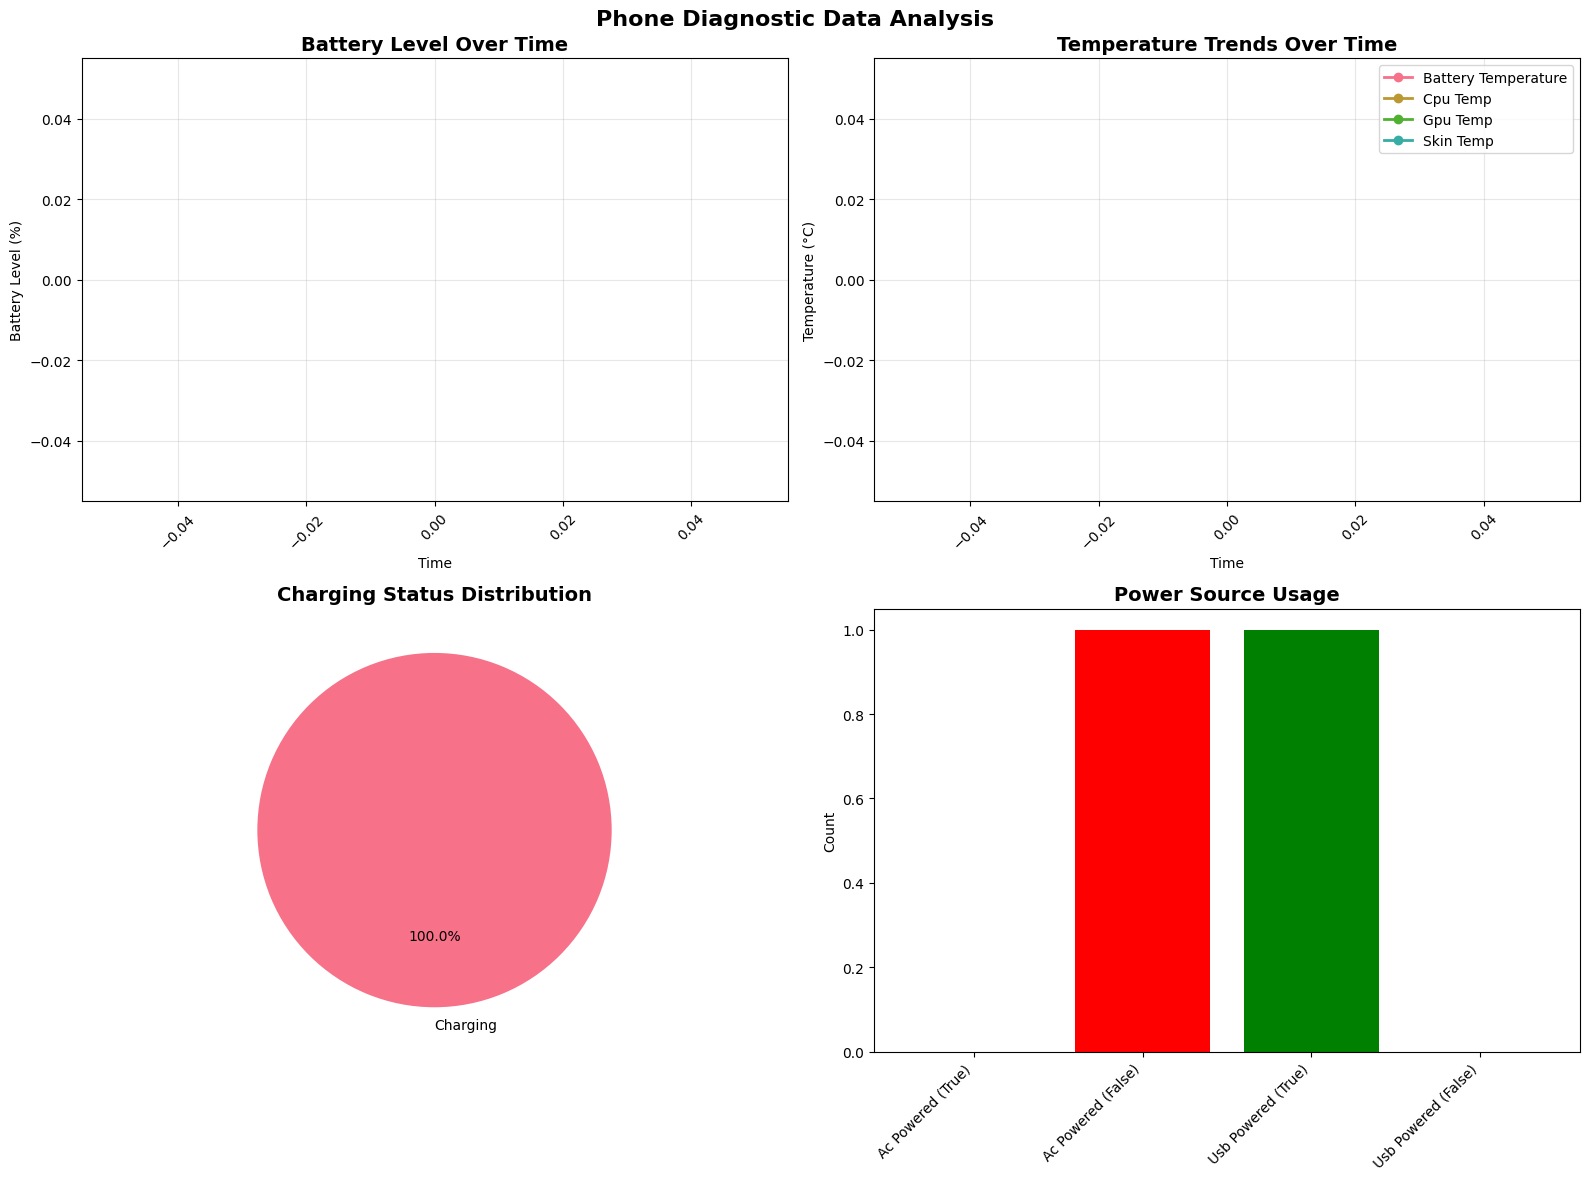


7. Exporting data...
Summary data exported to: phone_diagnostics_summary_20250822_162957.csv
Detailed data exported to: phone_diagnostics_detailed_20250822_162957.json

Data Export Summary:
  Total Sessions: 1
  Data Columns: 17
  Memory Usage: 0.5 KB

=== ANALYSIS COMPLETE ===
Complete analysis finished successfully!


In [23]:
# Run complete analysis pipeline (alternative approach)
print("Running complete analysis pipeline...")
try:
    parser, summary_df, parsed_data = run_complete_analysis()
    print("Complete analysis finished successfully!")
except Exception as e:
    print(f"Error in complete analysis: {e}")
    print("Individual analysis functions are still available above.")

In [24]:
# Quick test to verify everything is working
print("=== QUICK TEST ===")
print(f"Parser object: {type(parser)}")
print(f"Summary DataFrame shape: {summary_df.shape if not summary_df.empty else 'Empty'}")
print(f"Number of parsed sessions: {len(parsed_data)}")
print("=== TEST COMPLETE ===")

=== QUICK TEST ===
Parser object: <class 'phone_diagnostics_analysis.PhoneDiagnosticParser'>
Summary DataFrame shape: (1, 17)
Number of parsed sessions: 1
=== TEST COMPLETE ===
